In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('grayscale')

In [2]:
test = np.load('results/total_testsequence_window_losses.npy')
uncert= np.load('results/total_testsequence_window_losses_withuncertainty.npy')
onlymean = np.load('results/total_testsequence_window_losses_onlymean.npy')
n1 = np.load('results/total_testsequence_window_losses_n1.npy')

In [3]:
test.shape

(741, 327)

In [4]:
print(plt.style.available)

['seaborn-talk', 'seaborn-colorblind', 'dark_background', 'seaborn-dark-palette', 'bmh', 'seaborn-white', 'grayscale', 'ggplot', 'seaborn-bright', 'fast', 'seaborn-dark', 'tableau-colorblind10', 'seaborn-whitegrid', 'seaborn-paper', 'classic', 'seaborn', 'seaborn-muted', '_classic_test', 'seaborn-ticks', 'seaborn-notebook', 'Solarize_Light2', 'seaborn-darkgrid', 'seaborn-deep', 'fivethirtyeight', 'seaborn-pastel', 'seaborn-poster']


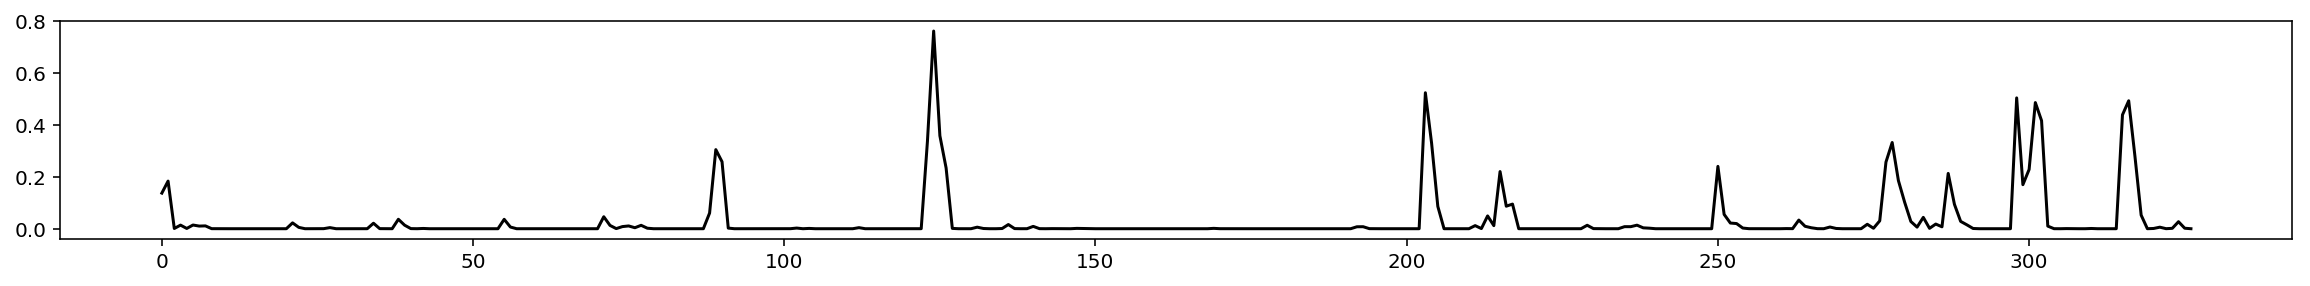

In [5]:
plt.figure(figsize=(20,2))
plt.plot(test[2,:])

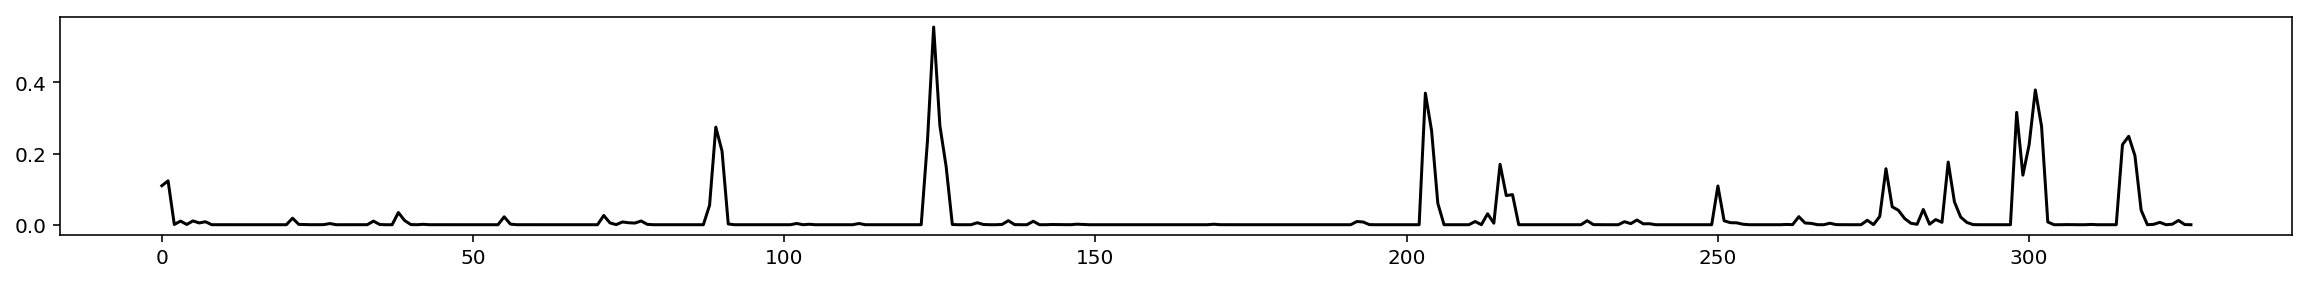

In [6]:
plt.figure(figsize=(20,2))
plt.plot(uncert[2,:])

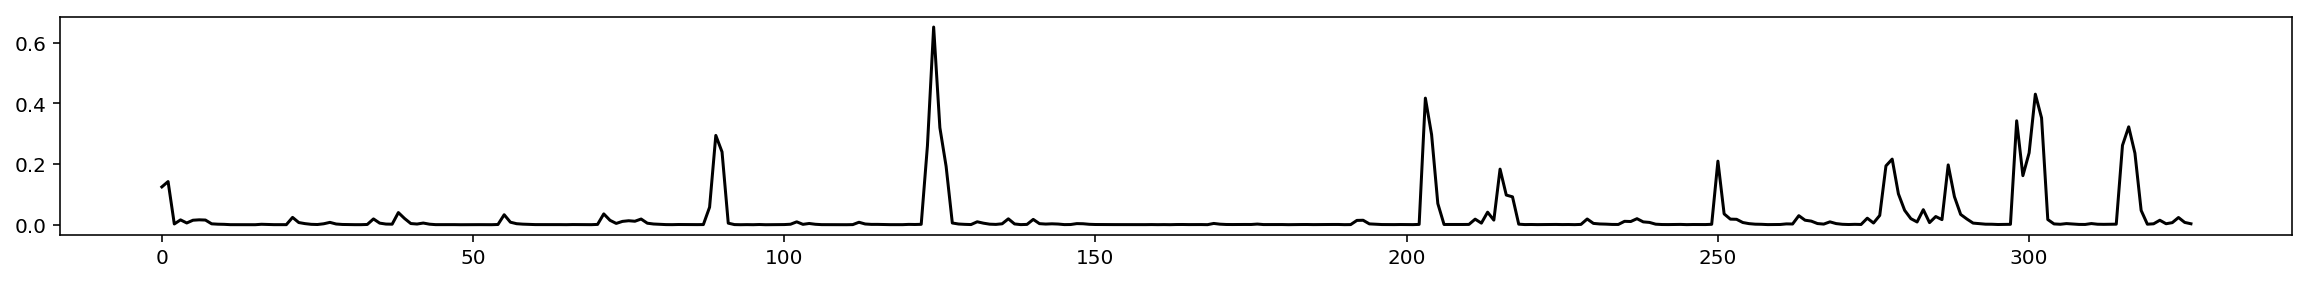

In [7]:
plt.figure(figsize=(20,2))
plt.plot(onlymean[2,:])

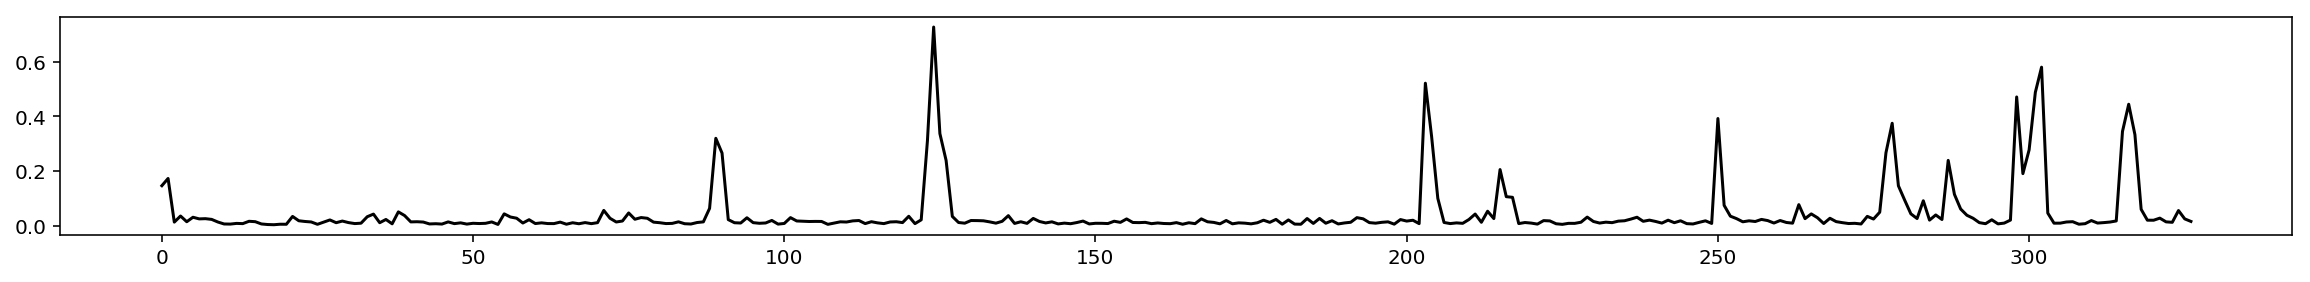

In [8]:
plt.figure(figsize=(20,2))
plt.plot(n1[2,:])

In [9]:
print('95 percent uncert crop ',np.sort(uncert.flatten())[int(741*327*0.95)])

95 percent uncert crop  0.33731913566589355


In [10]:
print('99 percent uncert crop ',np.sort(uncert.flatten())[int(741*327*0.99)])

99 percent uncert crop  8.758567810058594


In [11]:
print('95 percent mean crop ',np.sort(onlymean.flatten())[int(741*327*0.95)])

95 percent mean crop  0.4070758819580078


In [12]:
print('99 percent mean crop ',np.sort(onlymean.flatten())[int(741*327*0.99)])

99 percent mean crop  9.826025009155273


In [13]:
print('95 percent n1 crop ',np.sort(n1.flatten())[int(742*327*0.95)])

95 percent n1 crop  0.5805748701095581


In [14]:
print('99 percent n1 crop ',np.sort(n1.flatten())[int(742*327*0.99)])

99 percent n1 crop  15.14704418182373


### lets take remove values over 95%

In [15]:
cap_uncert = uncert.copy()
cap_uncert[cap_uncert > 0.33731913566589355] = 0.33731913566589355
cap_onlymean = onlymean.copy()
cap_onlymean[cap_onlymean > 0.4070758819580078] = 0.4070758819580078
cap_n1 = n1.copy()
cap_n1[cap_n1 > 0.5805748701095581] = 0.5805748701095581

## decide sequence max sum error

In [16]:
print('cutoff for uncert:')
print(np.sort(np.sum(cap_uncert, axis=1))[int(741*0.95)])

print('cutoff for only mean:')
print(np.sort(np.sum(cap_onlymean, axis=1))[int(741*0.95)])

print('cutoff for only n1:')
print(np.sort(np.sum(cap_n1, axis=1))[int(741*0.95)])

cutoff for uncert:
42.65411979705095
cutoff for only mean:
53.652546491939574
cutoff for only n1:
88.4090571925044


### remove values over 99%

In [17]:
#cap_uncert = uncert.copy()
#cap_uncert[cap_uncert > np.sort(uncert.flatten())[int(741*327*0.99)]] = np.sort(test.flatten())[int(741*327*0.99)]
#cap_onlymean = onlymean.copy()
#cap_onlymean[cap_onlymean > 0.41857674717903137] = 0.41857674717903137
#cap_n1 = n1.copy()
#cap_n1[cap_n1 > 0.5805748701095581] = 0.5805748701095581

In [18]:
uncert_sum = np.sum(cap_uncert,axis=1)
onlymean_sum = np.sum(cap_onlymean, axis=1)
n1_sum = np.sum(cap_n1, axis=1)

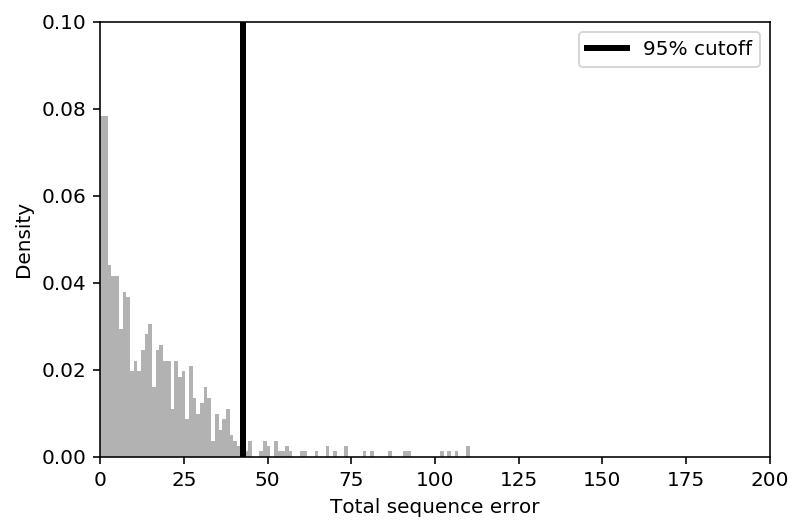

In [47]:
plt.figure()
plt.hist(np.sort(uncert_sum), bins=100, density=True, alpha=0.3)
plt.ylabel('Density')
plt.xlabel('Total sequence error')
plt.axvline(x=42.65411979705095, linewidth=3, label='95% cutoff')
plt.legend()
plt.ylim(0,0.1)
plt.xlim(0,200)
plt.savefig(fname='sequence_error_uncertainty.pdf')

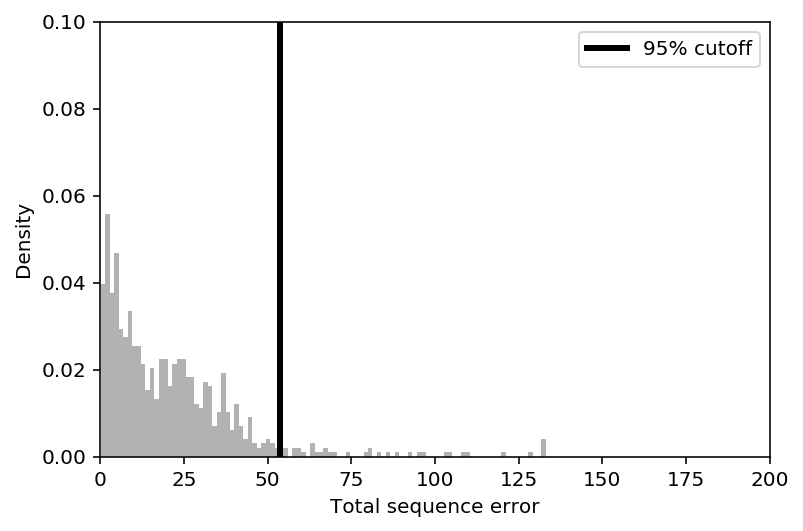

In [48]:
plt.figure()
plt.hist(np.sort(onlymean_sum), bins=100, density=True, alpha=0.3)
plt.xlabel('Total sequence error')
plt.ylabel('Density')
plt.axvline(x=53.652546491939574, linewidth=3.0, label='95% cutoff')
plt.legend()
plt.ylim(0,0.1)
plt.xlim(0,200)

plt.savefig(fname='sequence_error_mean.pdf')

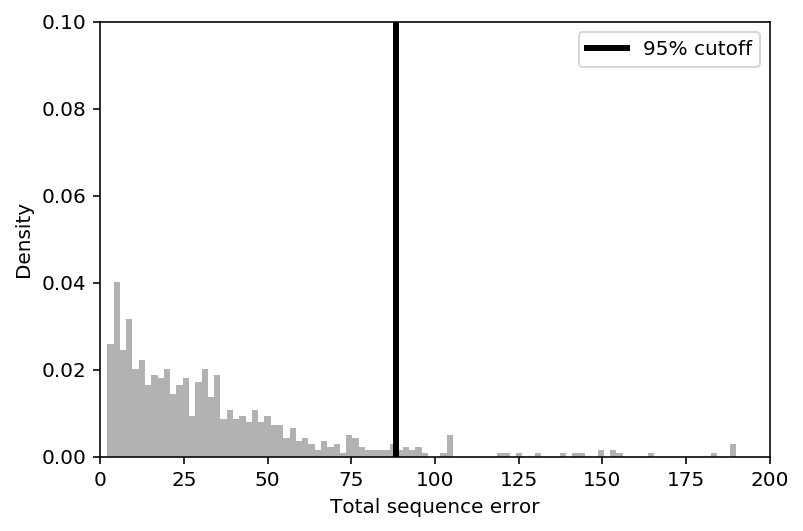

In [49]:
plt.figure()
plt.hist(np.sort(n1_sum), bins=100, density=True, alpha=0.3)
plt.ylabel('Density')
plt.xlabel('Total sequence error')
plt.axvline(x=88.4090571925044, linewidth=3.0 ,label='95% cutoff')
plt.ylim(0,0.1)
plt.xlim(0,200)
plt.legend()
plt.savefig(fname='sequence_error_n1.pdf')

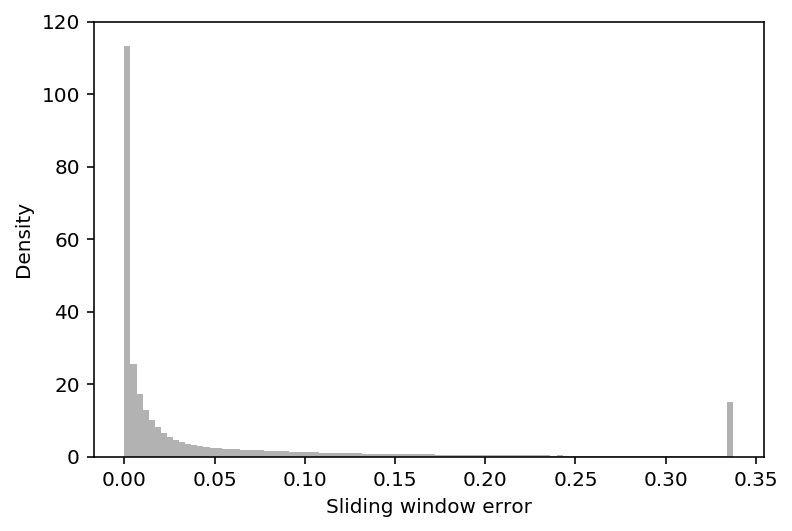

In [50]:
plt.figure()
plt.hist(cap_uncert.flatten(), bins=100 ,density=True,alpha=0.3)
plt.xlabel('Sliding window error')
plt.ylabel('Density')
plt.ylim(0,120)
plt.savefig(fname='window_error_uncertainty.pdf')

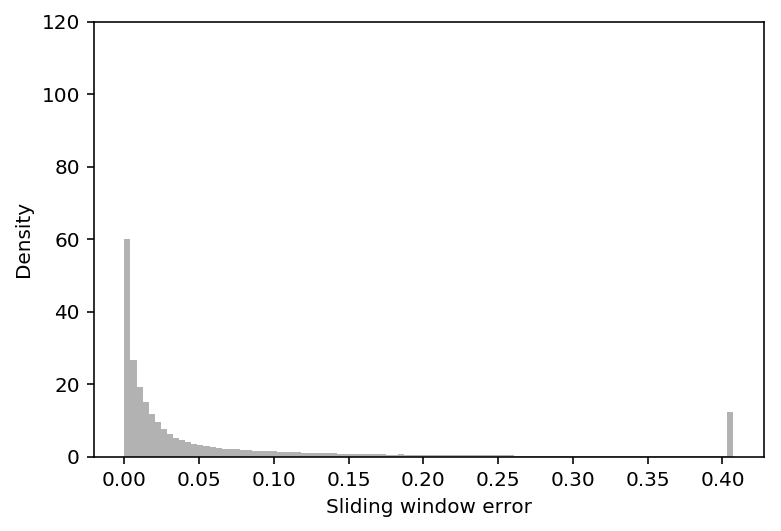

In [51]:
plt.figure()
plt.hist(cap_onlymean.flatten(), bins=100 ,density=True, alpha=0.3)
plt.xlabel('Sliding window error')
plt.ylabel('Density')
plt.ylim(0,120)
plt.savefig(fname='window_error_mean.pdf')

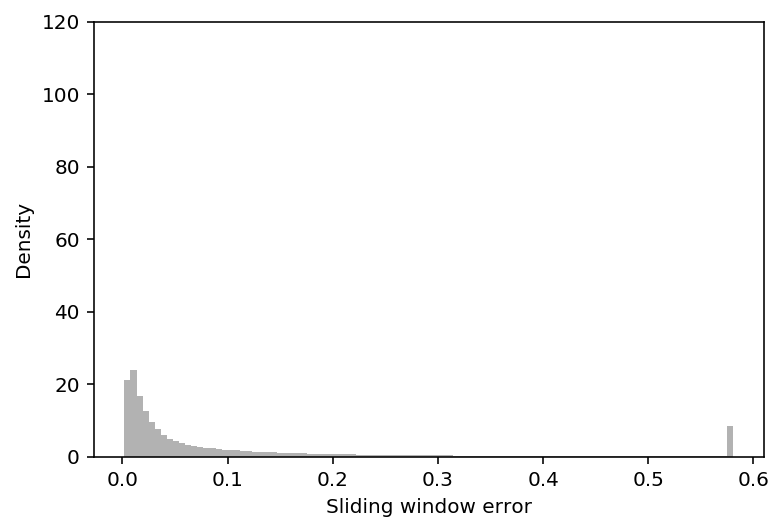

In [52]:
plt.figure()
plt.hist(cap_n1.flatten(), bins=100 ,density=True,alpha=0.3)
plt.xlabel('Sliding window error')
plt.ylabel('Density')
plt.ylim(0,120)

plt.savefig(fname='window_error_n1.pdf')

In [98]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

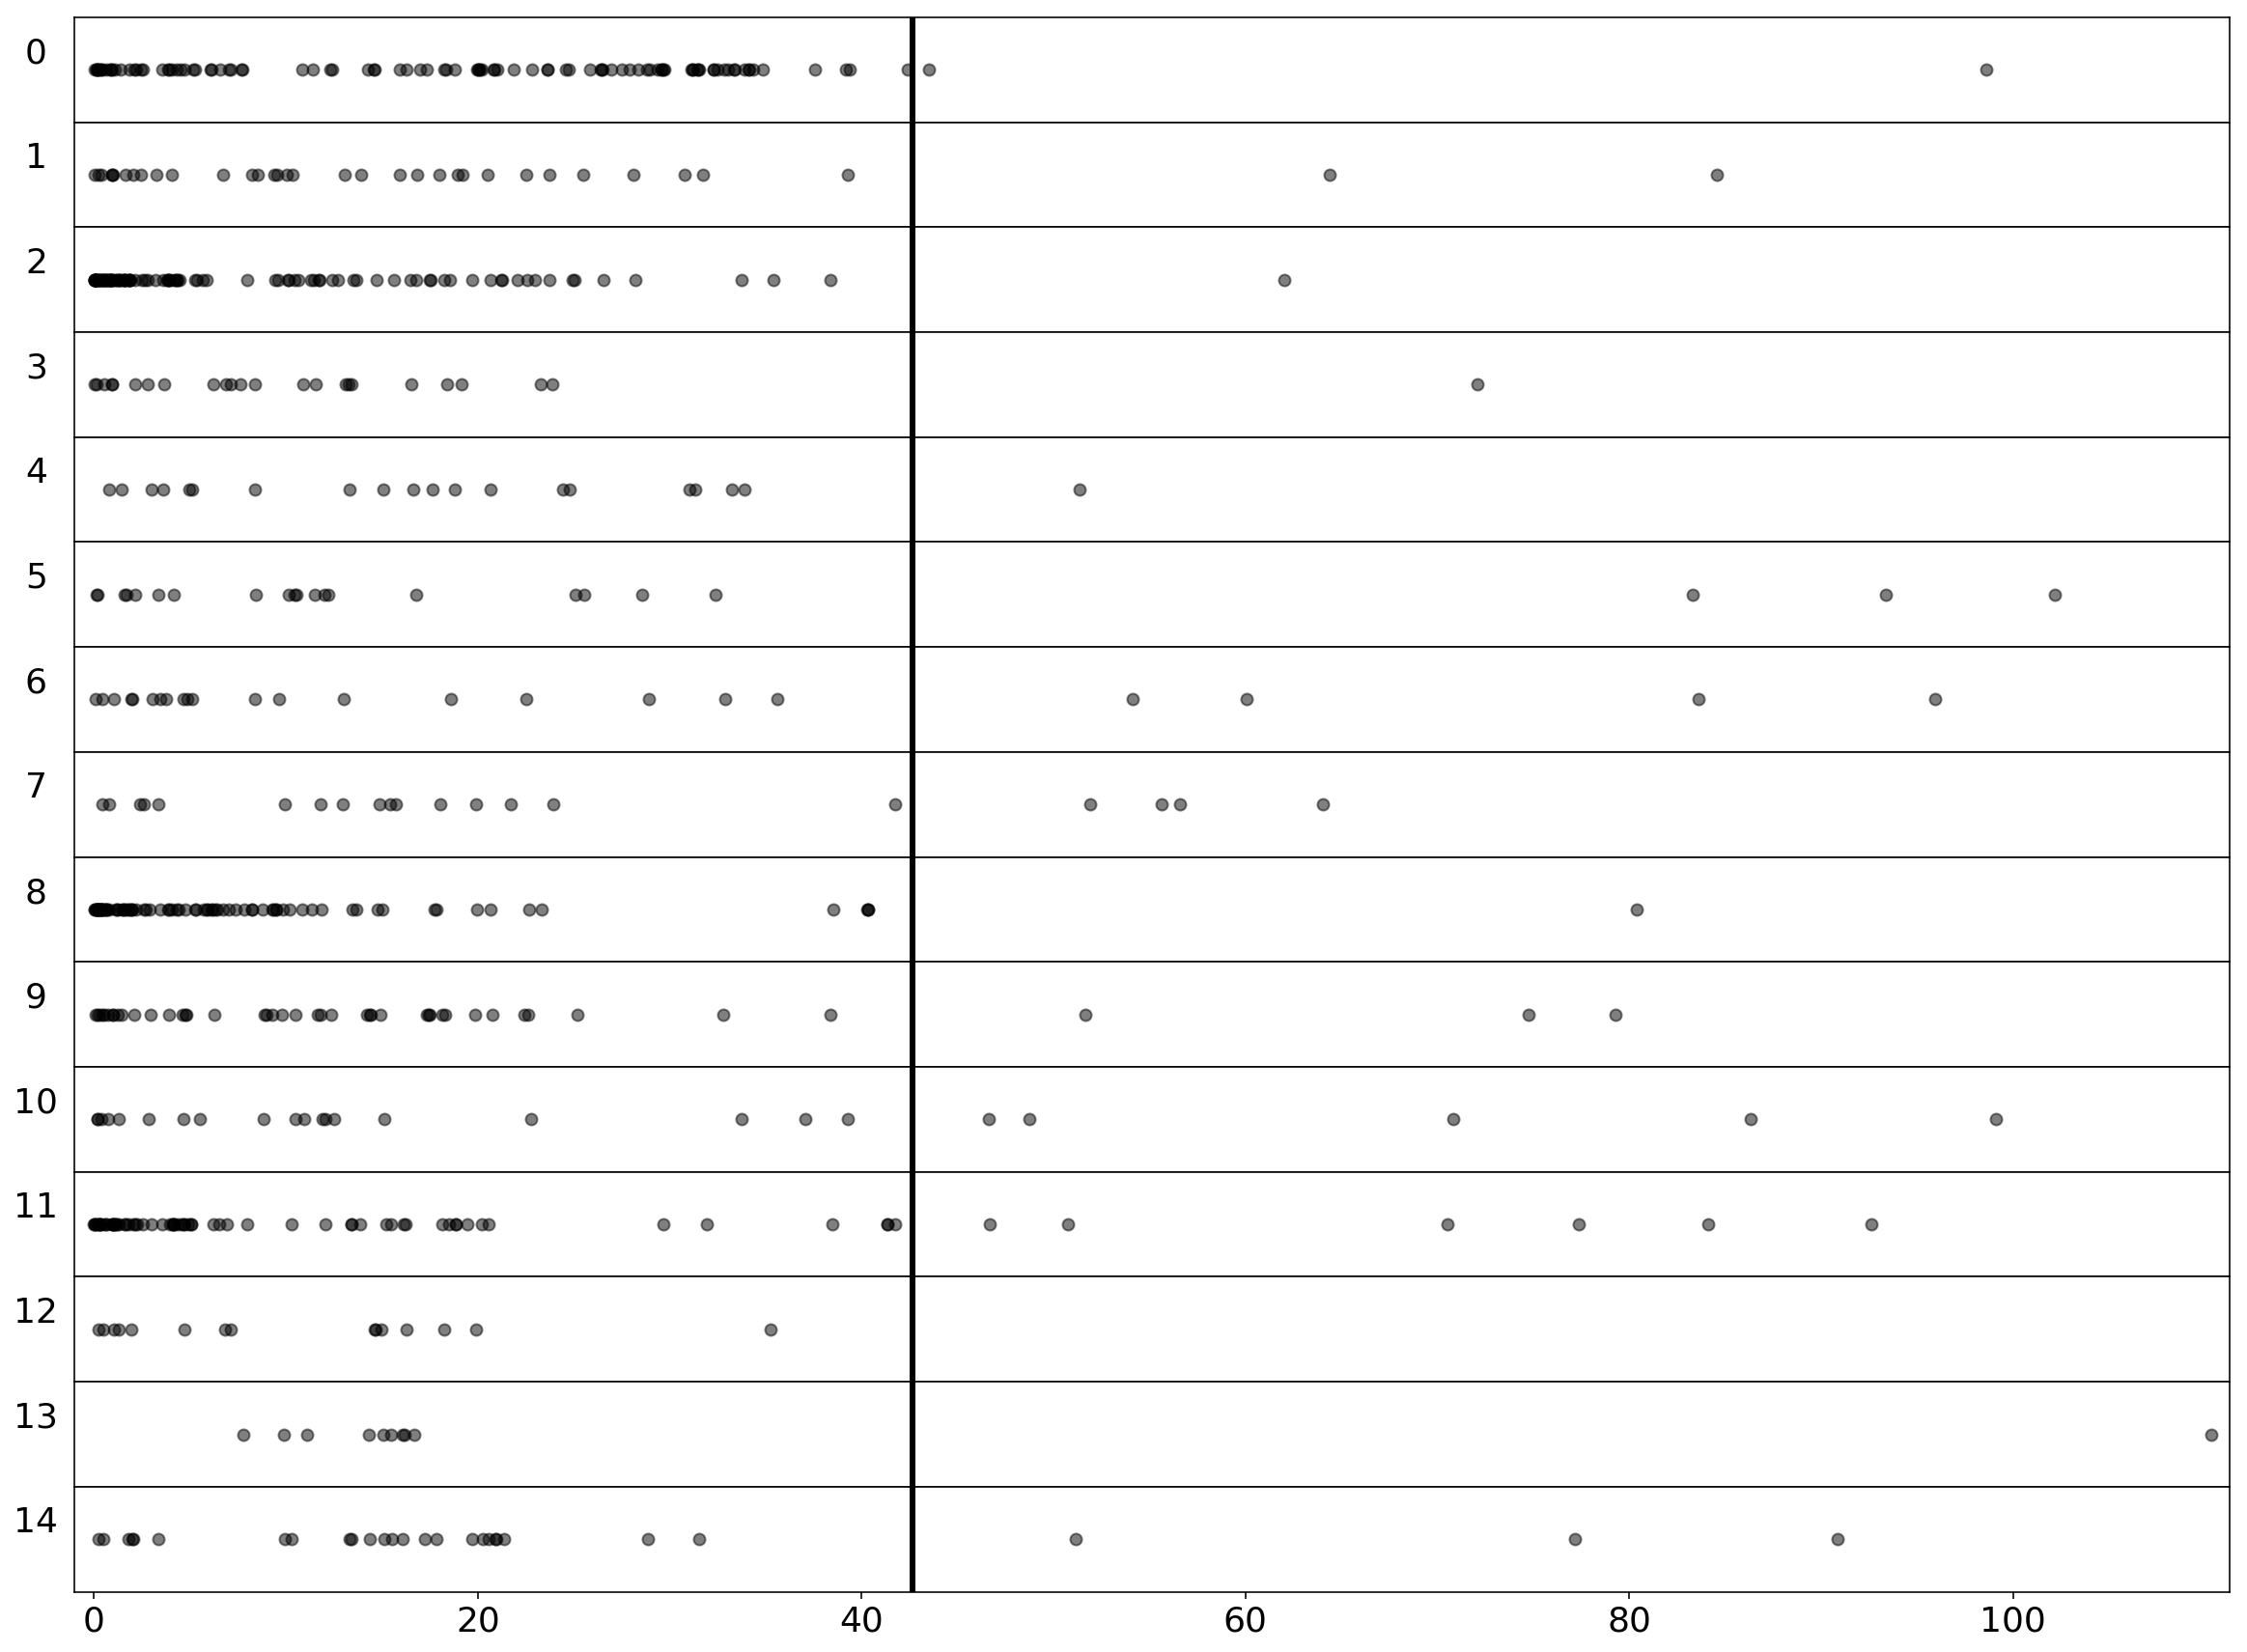

In [123]:
data = np.genfromtxt('results/uncertainty_damage_error.csv', delimiter=',')
fig, ax = plt.subplots(15, sharex=True, squeeze=True,figsize=(20,15))

for i in range(15):
    ax = plt.subplot(15,1,i+1)
    plt.scatter(data[1:,i], np.zeros_like(data[1:,i]), alpha=0.5)
    plt.ylabel(str(int(data[0,i])),  labelpad=20).set_rotation(0)
    ax.axes.get_yaxis().set_ticks([])
    plt.axvline(x=42.65411979705095,linewidth=3.0)
    plt.xlim(-1,np.nanmax(data)+1)
plt.subplots_adjust(wspace=0.5, hspace=0.0)

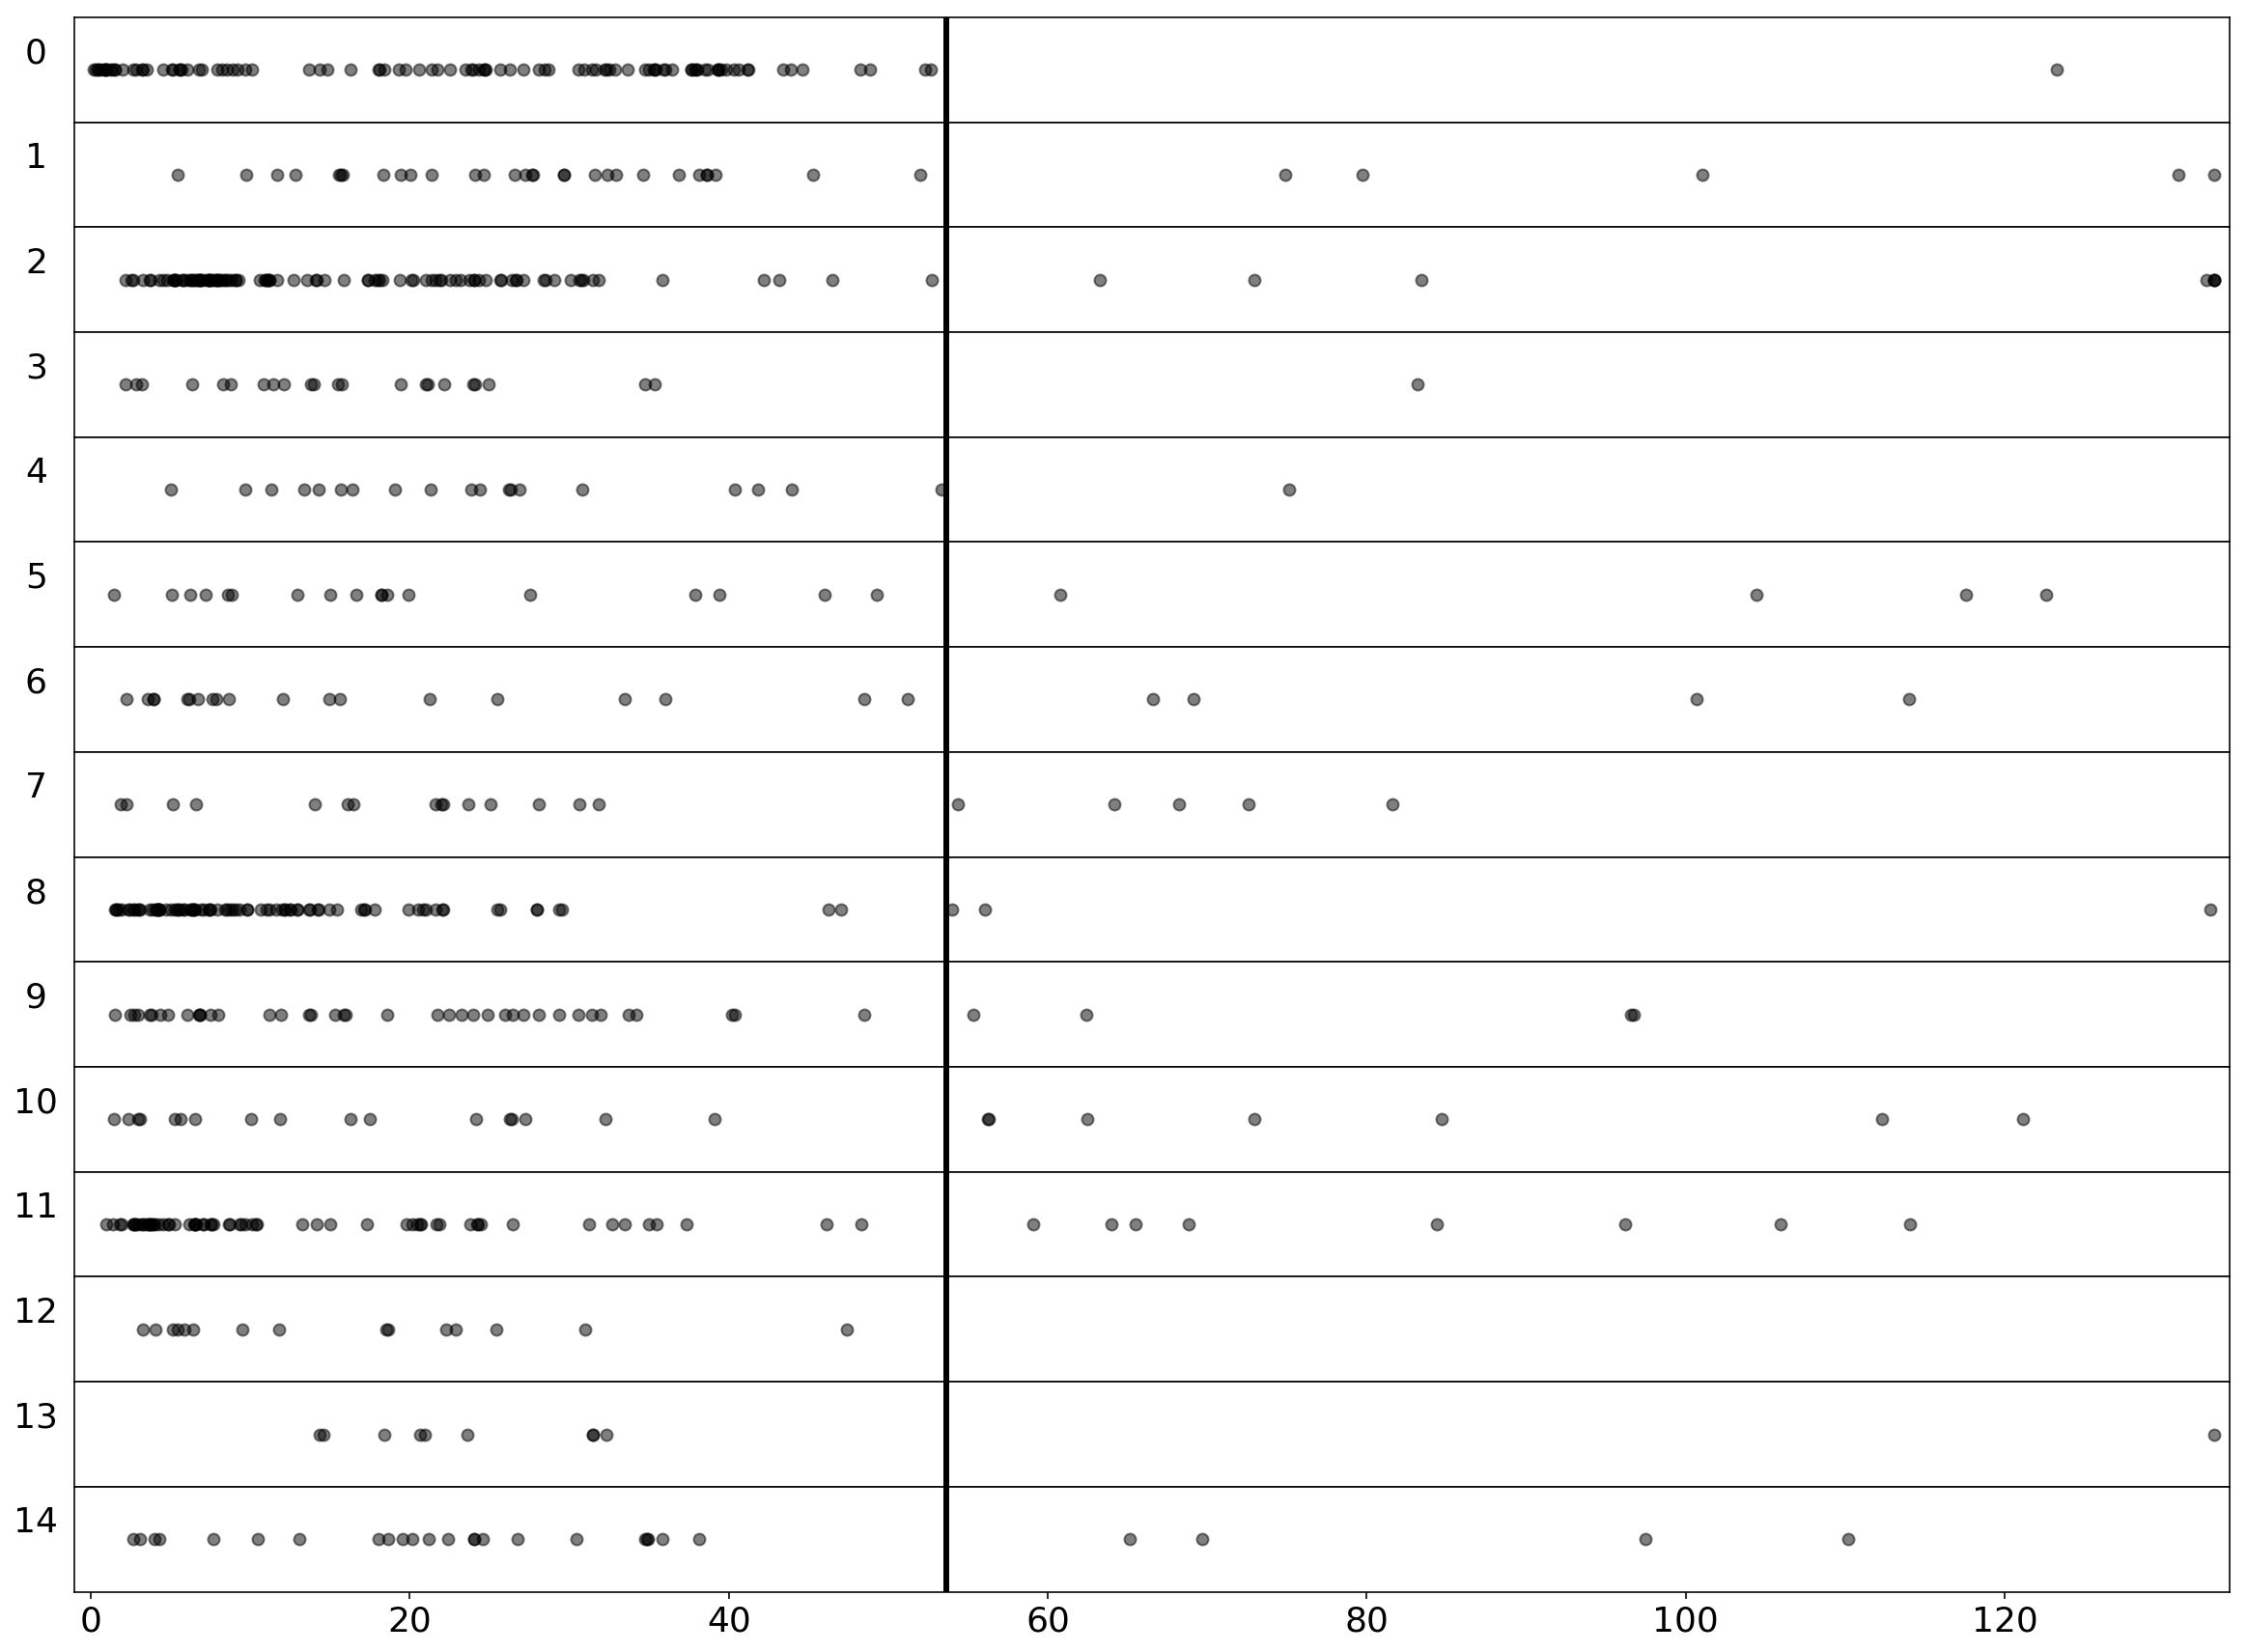

In [110]:
data = np.genfromtxt('results/mean_damage_error.csv', delimiter=',')
fig, ax = plt.subplots(15, sharex=True, squeeze=True,figsize=(20,15))

for i in range(15):
    ax = plt.subplot(15,1,i+1)
    plt.scatter(data[1:,i], np.zeros_like(data[1:,i]), alpha=0.5)
    plt.ylabel(str(int(data[0,i])),  labelpad=20).set_rotation(0)
    ax.axes.get_yaxis().set_ticks([])
    plt.axvline(x=53.652546491939574,linewidth=3.0)
    plt.xlim(-1,np.nanmax(data)+1)
plt.subplots_adjust(wspace=0.5, hspace=0.0)

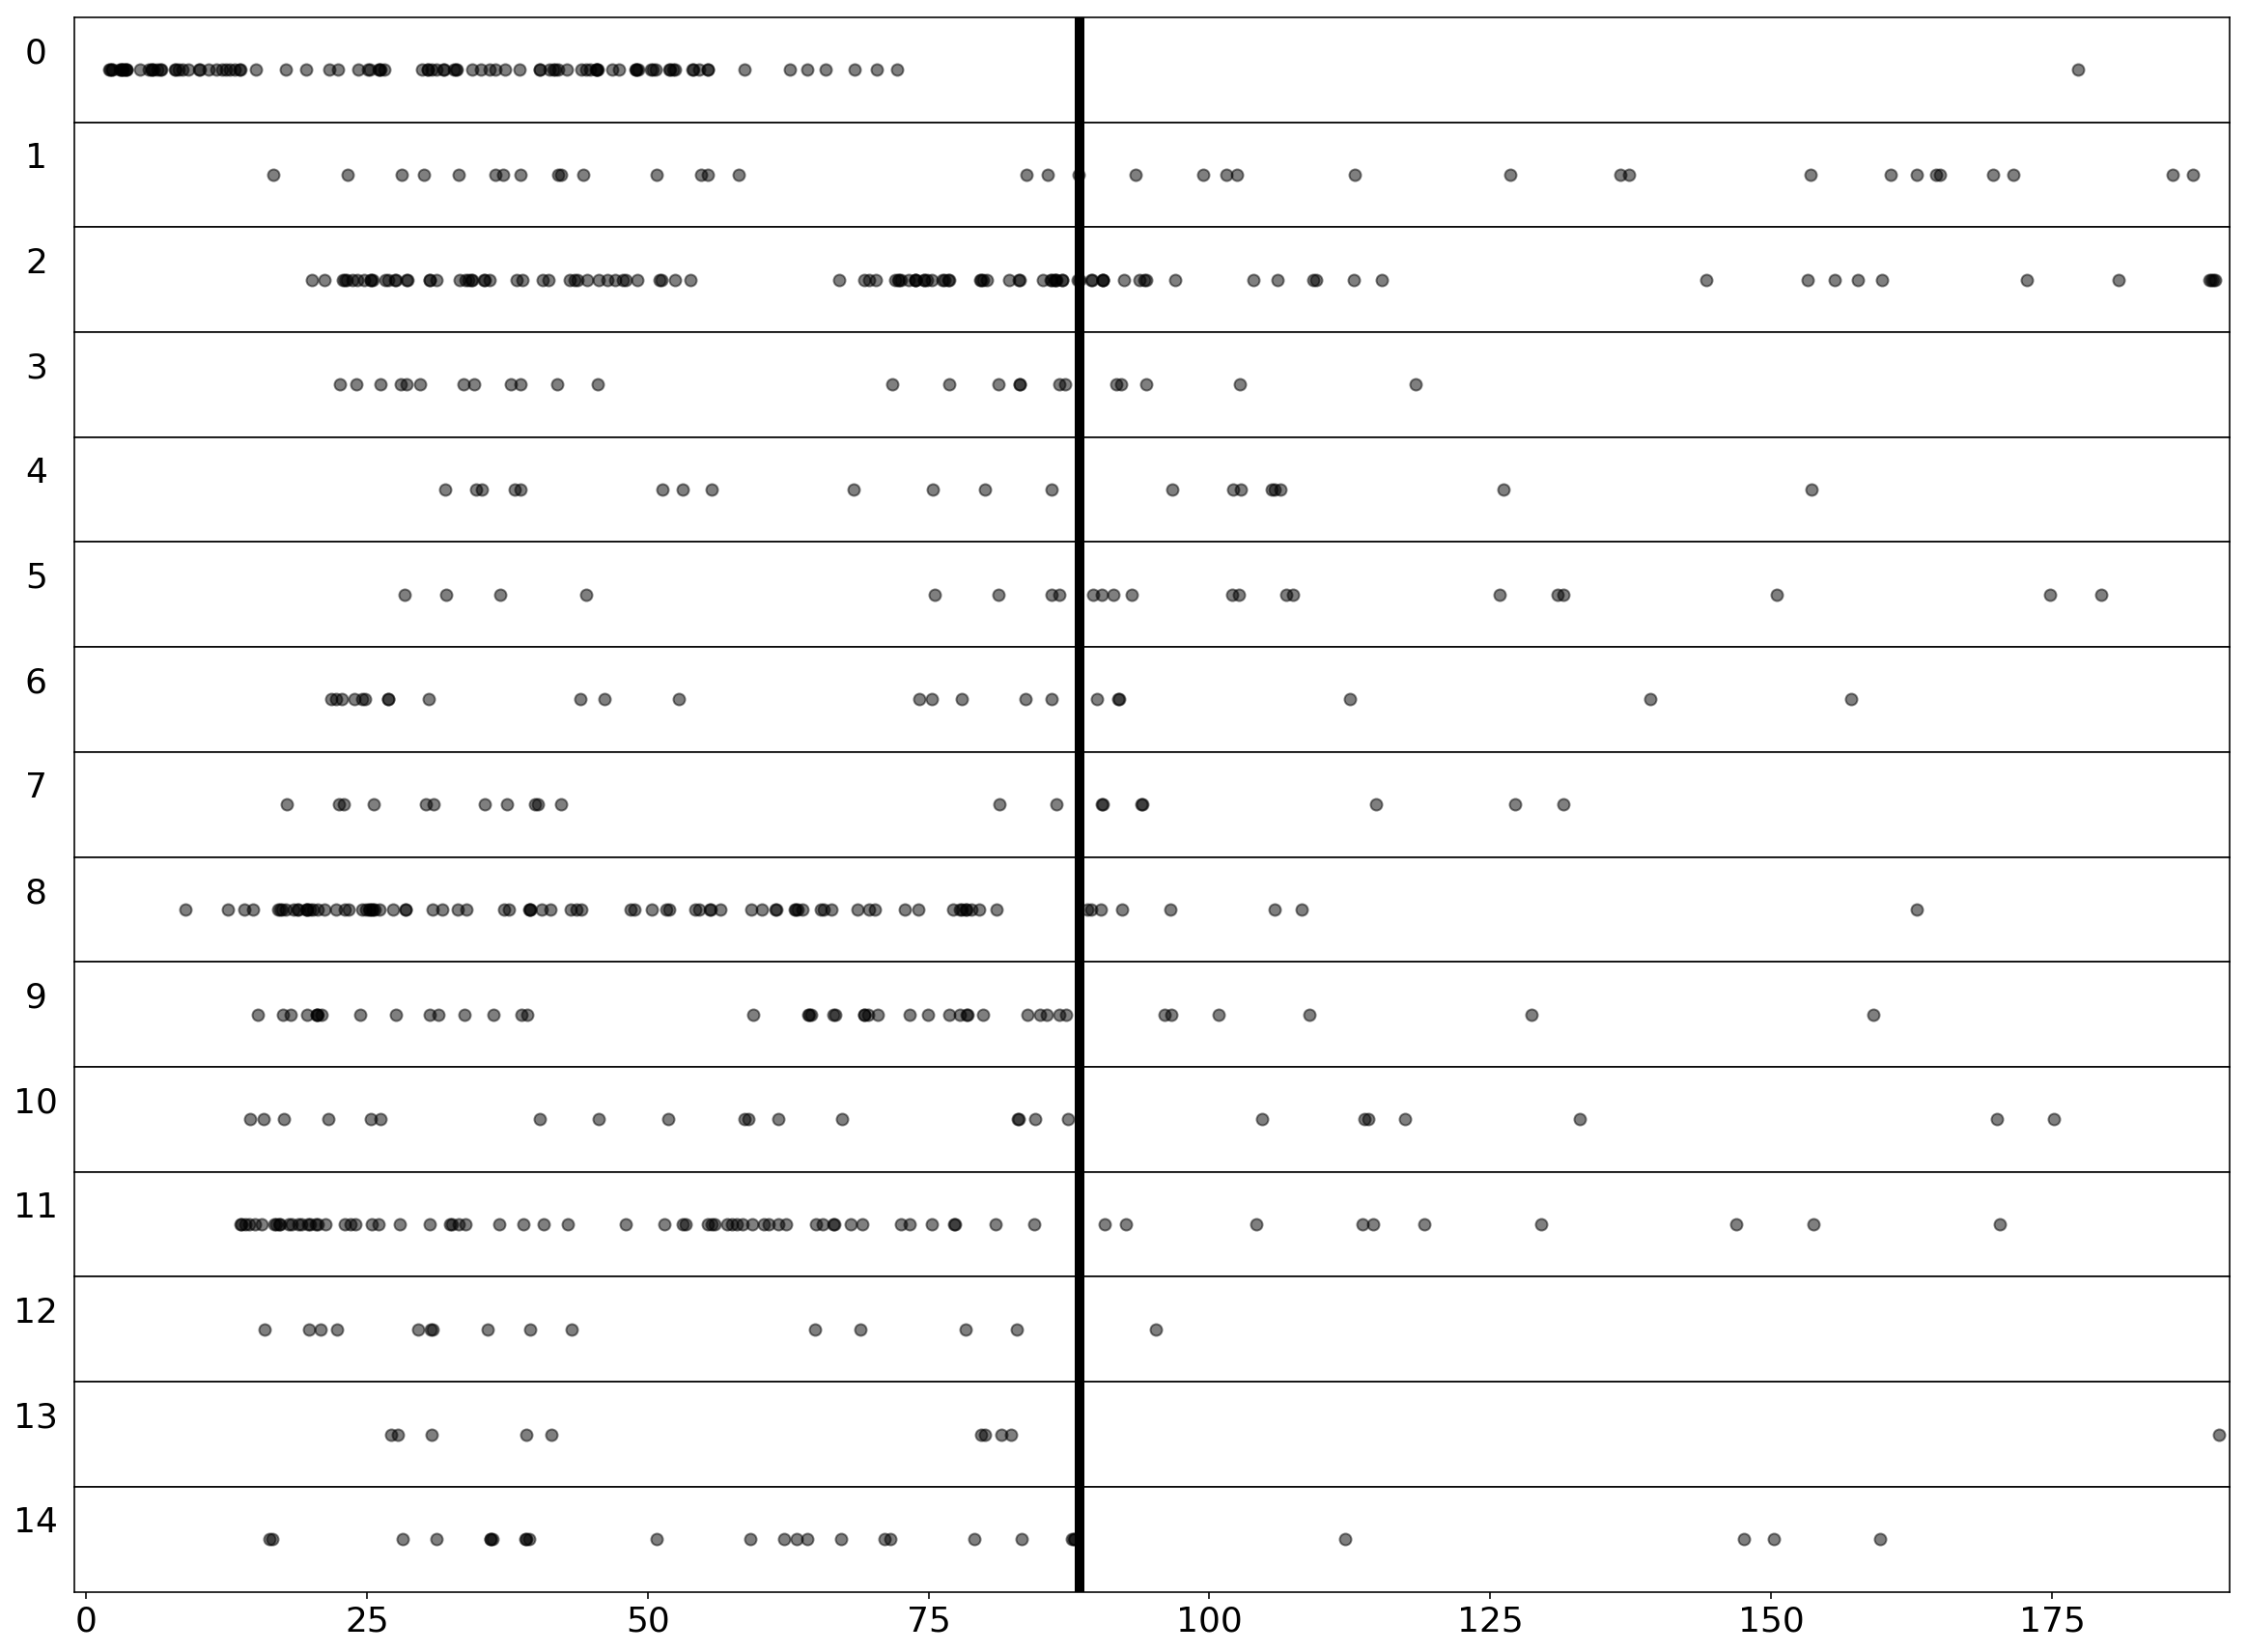

In [111]:
data = np.genfromtxt('results/n1_damage_error.csv', delimiter=',')
fig, ax = plt.subplots(15, sharex=True, squeeze=True,figsize=(20,15))

for i in range(15):
    ax = plt.subplot(15,1,i+1)
    plt.scatter(data[1:,i], np.zeros_like(data[1:,i]), alpha=0.5)
    plt.ylabel(str(int(data[0,i])),  labelpad=20).set_rotation(0)
    ax.axes.get_yaxis().set_ticks([])
    plt.axvline(x=88.4090571925044,linewidth=5.0)
    plt.xlim(-1,np.nanmax(data)+1)
plt.subplots_adjust(wspace=0.5, hspace=0.0)

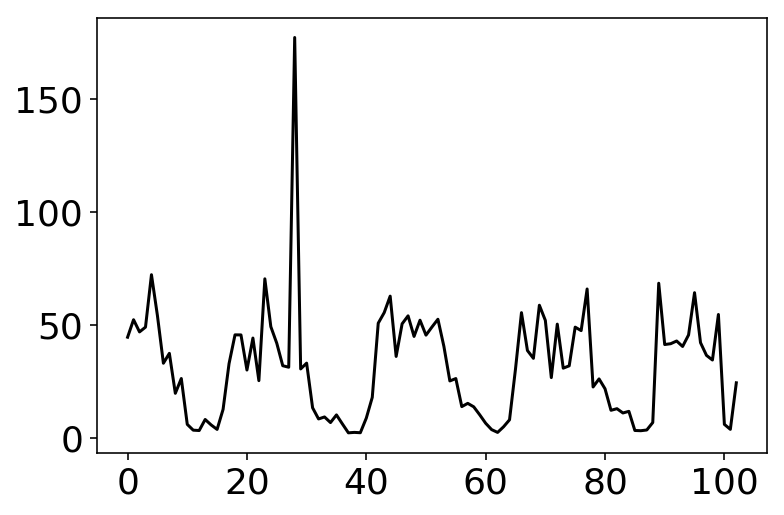

In [118]:
plt.plot(data[1:,0])

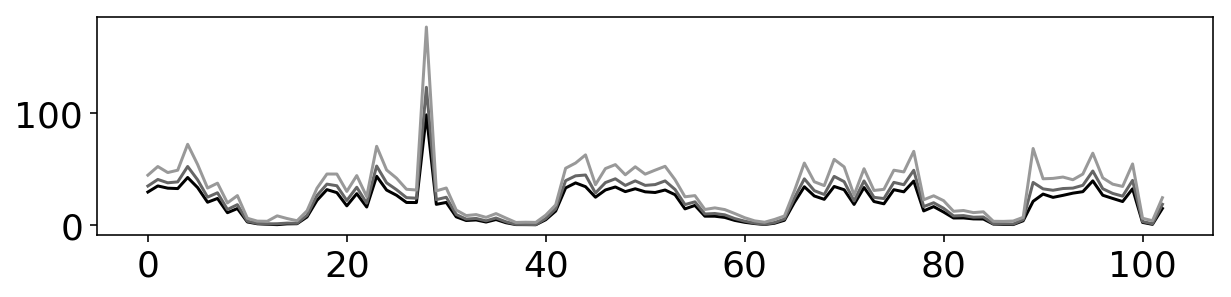

In [128]:
std = np.genfromtxt('results/uncertainty_damage_error.csv', delimiter=',')
mean = np.genfromtxt('results/mean_damage_error.csv', delimiter=',')
n1 = np.genfromtxt('results/n1_damage_error.csv', delimiter=',')

plt.figure(figsize=(10,2))
plt.plot(std[1:,0])
plt.plot(mean[1:,0])
plt.plot(n1[1:,0])

In [ ]:
\